In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("soft drink.csv",parse_dates=True,squeeze=True,index_col=0)

In [3]:
print(df.head())
print(df.tail())

YearMonth
1980-01-01    1954
1980-02-01    2302
1980-03-01    3054
1980-04-01    2414
1980-05-01    2226
Name: SoftDrinkProduction, dtype: int64
YearMonth
1995-03-01    4067
1995-04-01    4022
1995-05-01    3937
1995-06-01    4365
1995-07-01    4290
Name: SoftDrinkProduction, dtype: int64


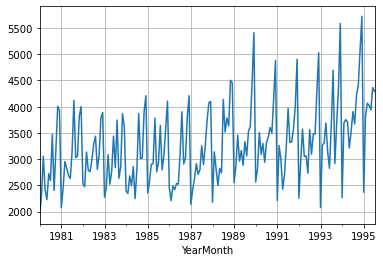

In [5]:
df.plot();
plt.grid()

In [5]:
df = pd.read_csv("soft drink.csv")

In [6]:
df.head()

,YearMonth,SoftDrinkProduction
0,1980-01,1954
1,1980-02,2302
2,1980-03,3054
3,1980-04,2414
4,1980-05,2226


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   YearMonth            187 non-null    object
 1   SoftDrinkProduction  187 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.0+ KB


In [8]:
df.dtypes

YearMonth              object
SoftDrinkProduction     int64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   YearMonth            187 non-null    object
 1   SoftDrinkProduction  187 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.0+ KB


In [10]:
#We are providing inputs to tell pandas that we are trying to work with time series.
df = pd.read_csv('soft drink.csv', parse_dates = ['YearMonth'])

In [11]:
df.dtypes

YearMonth              datetime64[ns]
SoftDrinkProduction             int64
dtype: object

In [12]:
df.isna().sum()

YearMonth              0
SoftDrinkProduction    0
dtype: int64

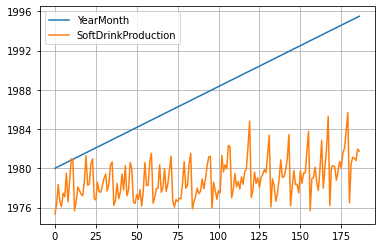

In [14]:
df.plot();
plt.grid()

In [15]:
date = pd.date_range(start='1980-01-01', end='1995-08-01', freq='M')

In [16]:
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [17]:
df['Time_Stamp'] = pd.DataFrame(date,columns=['YearMonth'])
df.head()

,YearMonth,SoftDrinkProduction,Time_Stamp
0,1980-01-01,1954,1980-01-31
1,1980-02-01,2302,1980-02-29
2,1980-03-01,3054,1980-03-31
3,1980-04-01,2414,1980-04-30
4,1980-05-01,2226,1980-05-31


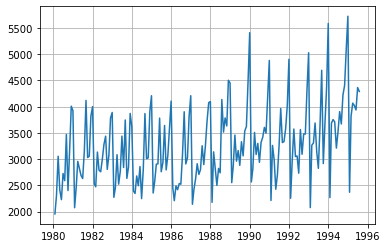

In [19]:
plt.plot(df['Time_Stamp'],df['SoftDrinkProduction']);
plt.grid()

In [20]:
df['Time_Stamp'] = pd.to_datetime(df['Time_Stamp'])

In [21]:
df = df.set_index('Time_Stamp')
df.drop(['YearMonth'], axis=1, inplace=True)
df.head()

,SoftDrinkProduction
Time_Stamp,
1980-01-31,1954
1980-02-29,2302
1980-03-31,3054
1980-04-30,2414
1980-05-31,2226


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-31 to 1995-07-31
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   SoftDrinkProduction  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


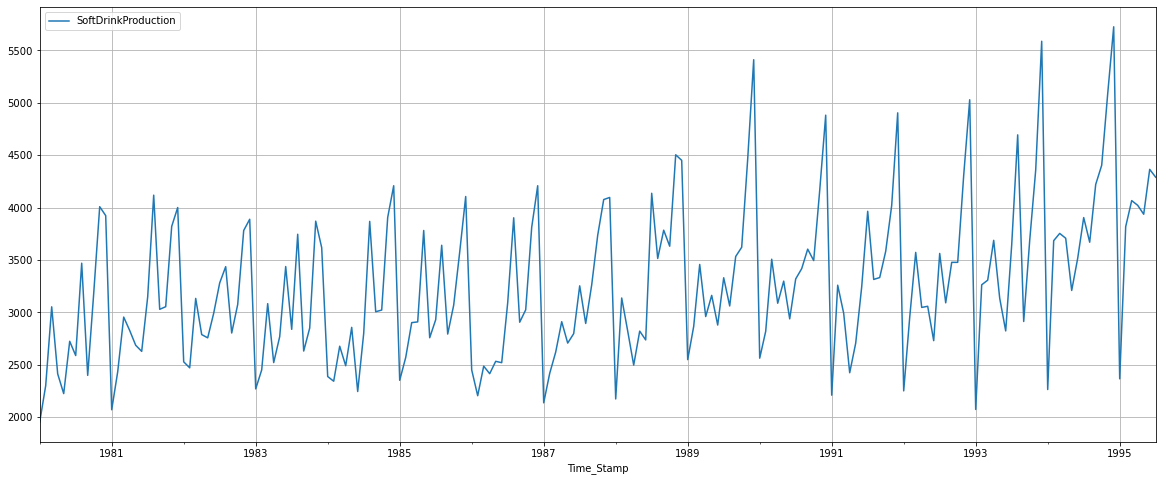

In [23]:
df.plot(figsize=(20,8))
plt.grid();

In [24]:
round(df.describe(),3)

,SoftDrinkProduction
count,187.000
mean,3262.610
std,728.357
min,1954.000
25%,2748.000
50%,3134.000
75%,3741.000
max,5725.000


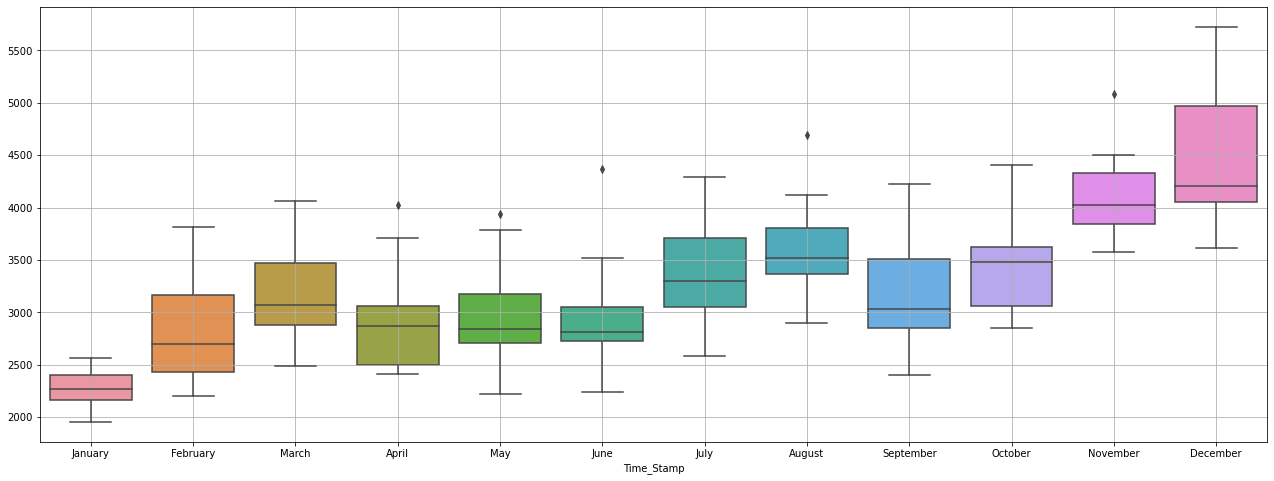

In [25]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.month_name(),y = df.values[:,0],ax=ax)
plt.grid();

<AxesSubplot:xlabel='Time_Stamp'>

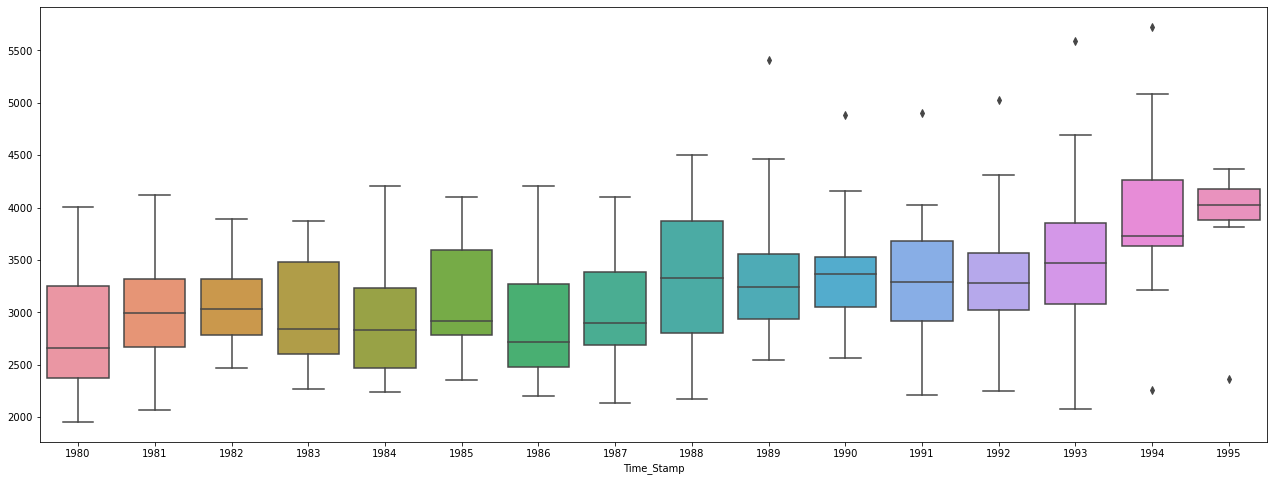

In [26]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.year,y = df.values[:,0],ax=ax)

In [27]:
monthly_sales_across_years = pd.pivot_table(df, values = 'SoftDrinkProduction', columns = df.index.month_name(), index = df.index.year)
monthly_sales_across_years

Time_Stamp,April,August,December,February,January,July,June,March,May,November,October,September
Time_Stamp,,,,,,,,,,,,
1980,2414.0,3470.0,3924.0,2302.0,1954.0,2589.0,2725.0,3054.0,2226.0,4009.0,3180.0,2400.0
1981,2828.0,4119.0,4001.0,2434.0,2072.0,3150.0,2629.0,2956.0,2687.0,3821.0,3055.0,3030.0
1982,2789.0,3437.0,3889.0,2472.0,2529.0,3282.0,2993.0,3134.0,2758.0,3782.0,3076.0,2804.0
1983,2522.0,3746.0,3618.0,2452.0,2271.0,2839.0,3438.0,3084.0,2769.0,3871.0,2851.0,2632.0
1984,2492.0,3869.0,4209.0,2344.0,2389.0,2800.0,2246.0,2678.0,2858.0,3907.0,3023.0,3007.0
1985,2910.0,3641.0,4106.0,2570.0,2353.0,2931.0,2759.0,2903.0,3782.0,3576.0,3070.0,2794.0
1986,2416.0,3903.0,4209.0,2206.0,2452.0,3093.0,2521.0,2488.0,2534.0,3812.0,3025.0,2907.0
1987,2912.0,2895.0,4097.0,2419.0,2138.0,3254.0,2798.0,2622.0,2708.0,4077.0,3736.0,3263.0
1988,2498.0,3515.0,4451.0,3138.0,2175.0,4137.0,2738.0,2823.0,2822.0,4504.0,3632.0,3785.0


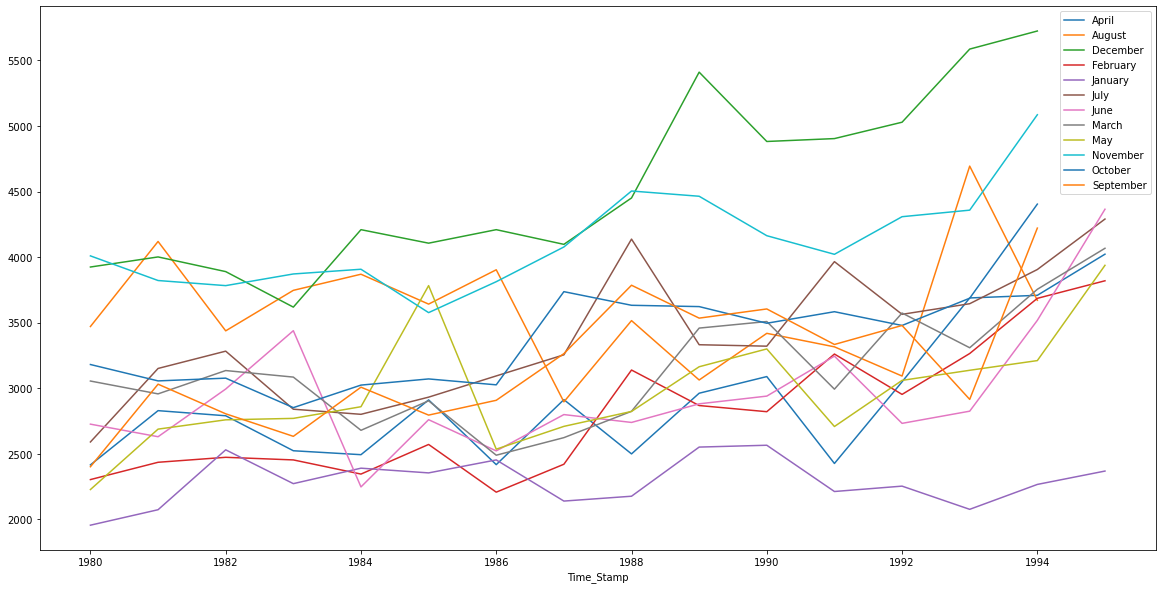

In [28]:
monthly_sales_across_years.plot(figsize=(20,10))
plt.grid
plt.legend(loc='best');

In [29]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

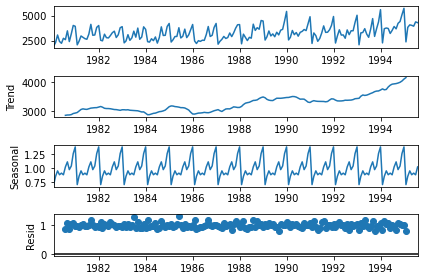

In [30]:
decomposition = seasonal_decompose(df,model='multiplicative')
decomposition.plot();

In [31]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2858.833333
1980-08-31    2869.250000
1980-09-30    2870.666667
1980-10-31    2883.833333
1980-11-30    2920.291667
1980-12-31    2935.500000
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    0.709526
1980-02-29    0.856420
1980-03-31    0.953935
1980-04-30    0.885217
1980-05-31    0.913735
1980-06-30    0.883890
1980-07-31    1.023936
1980-08-31    1.114195
1980-09-30    0.975955
1980-10-31    1.040944
1980-11-30    1.261792
1980-12-31    1.380456
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    0.884444
1980-08-31    1.085425
1980-09-30    0.856641
1980-10-31    1.059326
1980-11-30    1.087983
1980-12-31    0.968332
Name: r

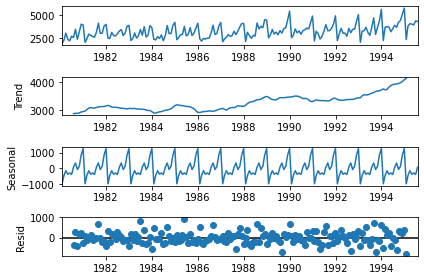

In [32]:
decomposition = seasonal_decompose(df,model='additive')
decomposition.plot();

In [33]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2858.833333
1980-08-31    2869.250000
1980-09-30    2870.666667
1980-10-31    2883.833333
1980-11-30    2920.291667
1980-12-31    2935.500000
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    -974.619692
1980-02-29    -451.246677
1980-03-31    -143.118700
1980-04-30    -366.181200
1980-05-31    -286.815129
1980-06-30    -383.594891
1980-07-31      82.191419
1980-08-31     346.363641
1980-09-30     -69.997470
1980-10-31     136.721974
1980-11-30     850.369196
1980-12-31    1259.927530
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31   -352.024752
1980-08-31    254.386359
1980-09-30   -400.669196
1980-10-31    159.4446

In [34]:
#Since this is an additive model:
#Observed = Trend + Seasonal + Irregular should hold true
2360.666667+ -465.502265+ 70.835599

1966.0000009999999

In [35]:
train             = df[df.index<'1991'] 
test              = df[df.index>='1991']

In [36]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


In [37]:
print('First few rows of Training Data','\n',train.head(),'\n')
print('Last few rows of Training Data','\n',train.tail(),'\n')
print('First few rows of Test Data','\n',test.head(),'\n')
print('Last few rows of Test Data','\n',test.tail(),'\n')

First few rows of Training Data 
             SoftDrinkProduction
Time_Stamp                     
1980-01-31                 1954
1980-02-29                 2302
1980-03-31                 3054
1980-04-30                 2414
1980-05-31                 2226 

Last few rows of Training Data 
             SoftDrinkProduction
Time_Stamp                     
1990-08-31                 3418
1990-09-30                 3604
1990-10-31                 3495
1990-11-30                 4163
1990-12-31                 4882 

First few rows of Test Data 
             SoftDrinkProduction
Time_Stamp                     
1991-01-31                 2211
1991-02-28                 3260
1991-03-31                 2992
1991-04-30                 2425
1991-05-31                 2707 

Last few rows of Test Data 
             SoftDrinkProduction
Time_Stamp                     
1995-03-31                 4067
1995-04-30                 4022
1995-05-31                 3937
1995-06-30                 4365
1995

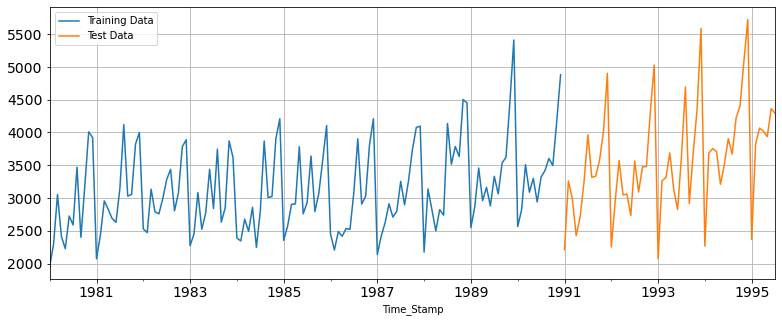

In [38]:
train['SoftDrinkProduction'].plot(figsize=(13,5), fontsize=14)
test['SoftDrinkProduction'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])

In [39]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [40]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [41]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             SoftDrinkProduction  time
Time_Stamp                           
1980-01-31                 1954     1
1980-02-29                 2302     2
1980-03-31                 3054     3
1980-04-30                 2414     4
1980-05-31                 2226     5 

Last few rows of Training Data 
             SoftDrinkProduction  time
Time_Stamp                           
1990-08-31                 3418   128
1990-09-30                 3604   129
1990-10-31                 3495   130
1990-11-30                 4163   131
1990-12-31                 4882   132 

First few rows of Test Data 
             SoftDrinkProduction  time
Time_Stamp                           
1991-01-31                 2211   133
1991-02-28                 3260   134
1991-03-31                 2992   135
1991-04-30                 2425   136
1991-05-31                 2707   137 

Last few rows of Test Data 
             SoftDrinkProduction  time
Time_Stamp                      

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
lr = LinearRegression()

In [44]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['SoftDrinkProduction'].values)

LinearRegression()

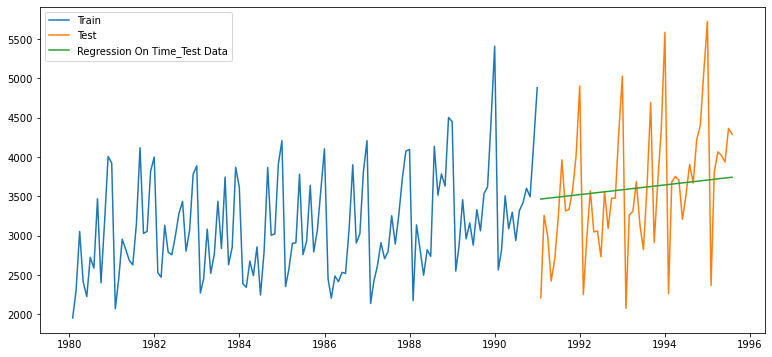

In [45]:
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['SoftDrinkProduction'], label='Train')
plt.plot(test['SoftDrinkProduction'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')

In [46]:
from sklearn import metrics

In [47]:
## Test Data - RMSE

rmse_model1_test = metrics.mean_squared_error(test['SoftDrinkProduction'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 775.808


In [48]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

,Test RMSE
RegressionOnTime,775.80781


In [49]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [50]:
train.tail()

,SoftDrinkProduction
Time_Stamp,
1990-08-31,3418
1990-09-30,3604
1990-10-31,3495
1990-11-30,4163
1990-12-31,4882


In [51]:
NaiveModel_test['naive'] = np.asarray(train['SoftDrinkProduction'])[len(np.asarray(train['SoftDrinkProduction']))-1]
NaiveModel_test['naive'].head()

Time_Stamp
1991-01-31    4882
1991-02-28    4882
1991-03-31    4882
1991-04-30    4882
1991-05-31    4882
Name: naive, dtype: int64

Text(0.5, 1.0, 'Naive Forecast')

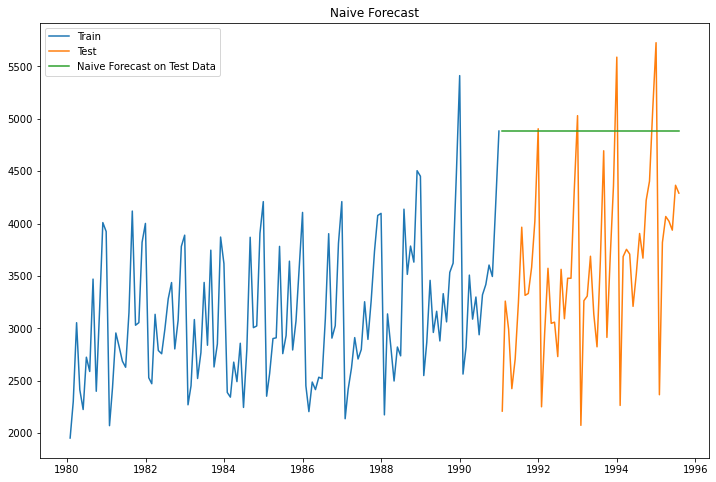

In [52]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['SoftDrinkProduction'], label='Train')
plt.plot(test['SoftDrinkProduction'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")

In [53]:
## Test Data - RMSE

rmse_model2_test = metrics.mean_squared_error(test['SoftDrinkProduction'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1519.259


In [54]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE
RegressionOnTime,775.807810
NaiveModel,1519.259233


In [55]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [56]:
SimpleAverage_test['mean_forecast'] = train['SoftDrinkProduction'].mean()
SimpleAverage_test.head()

,SoftDrinkProduction,mean_forecast
Time_Stamp,,
1991-01-31,2211,3124.166667
1991-02-28,3260,3124.166667
1991-03-31,2992,3124.166667
1991-04-30,2425,3124.166667
1991-05-31,2707,3124.166667


Text(0.5, 1.0, 'Simple Average Forecast')

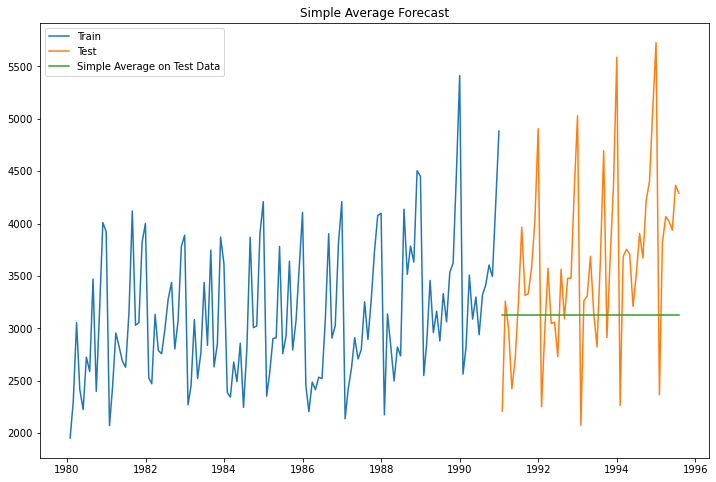

In [57]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['SoftDrinkProduction'], label='Train')
plt.plot(SimpleAverage_test['SoftDrinkProduction'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")

In [58]:
## Test Data - RMSE 

rmse_model3_test = metrics.mean_squared_error(test['SoftDrinkProduction'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 934.353


In [59]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE
RegressionOnTime,775.807810
NaiveModel,1519.259233
SimpleAverageModel,934.353358


In [60]:
MovingAverage_train = train.copy()
MovingAverage_test = test.copy()

In [61]:
MovingAverage_train['Trailing_2'] = MovingAverage_train['SoftDrinkProduction'].rolling(2).mean()
MovingAverage_train['Trailing_4'] = MovingAverage_train['SoftDrinkProduction'].rolling(4).mean()
MovingAverage_train['Trailing_6'] = MovingAverage_train['SoftDrinkProduction'].rolling(6).mean()
MovingAverage_train['Trailing_9'] = MovingAverage_train['SoftDrinkProduction'].rolling(9).mean()

MovingAverage_train.tail()

,SoftDrinkProduction,Trailing_2,Trailing_4,Trailing_6,Trailing_9
Time_Stamp,,,,,
1990-08-31,3418,3369.0,3244.00,3262.000000,3374.111111
1990-09-30,3604,3511.0,3320.25,3278.000000,3173.333333
1990-10-31,3495,3549.5,3459.25,3345.833333,3276.777778
1990-11-30,4163,3829.0,3670.00,3489.833333,3426.000000
1990-12-31,4882,4522.5,4036.00,3813.666667,3578.666667


In [62]:
# Remove scientific notations and display numbers with 2 decimal points instead
pd.options.display.float_format = '{:.2f}'.format 

MovingAverage_train['Trailing_2'] = MovingAverage_train['SoftDrinkProduction'].rolling(2).mean()
MovingAverage_train['Trailing_4'] = MovingAverage_train['SoftDrinkProduction'].rolling(4).mean()
MovingAverage_train['Trailing_6'] = MovingAverage_train['SoftDrinkProduction'].rolling(6).mean()
MovingAverage_train['Trailing_9'] = MovingAverage_train['SoftDrinkProduction'].rolling(9).mean()

MovingAverage_train.tail()

,SoftDrinkProduction,Trailing_2,Trailing_4,Trailing_6,Trailing_9
Time_Stamp,,,,,
1990-08-31,3418,3369.00,3244.00,3262.00,3374.11
1990-09-30,3604,3511.00,3320.25,3278.00,3173.33
1990-10-31,3495,3549.50,3459.25,3345.83,3276.78
1990-11-30,4163,3829.00,3670.00,3489.83,3426.00
1990-12-31,4882,4522.50,4036.00,3813.67,3578.67


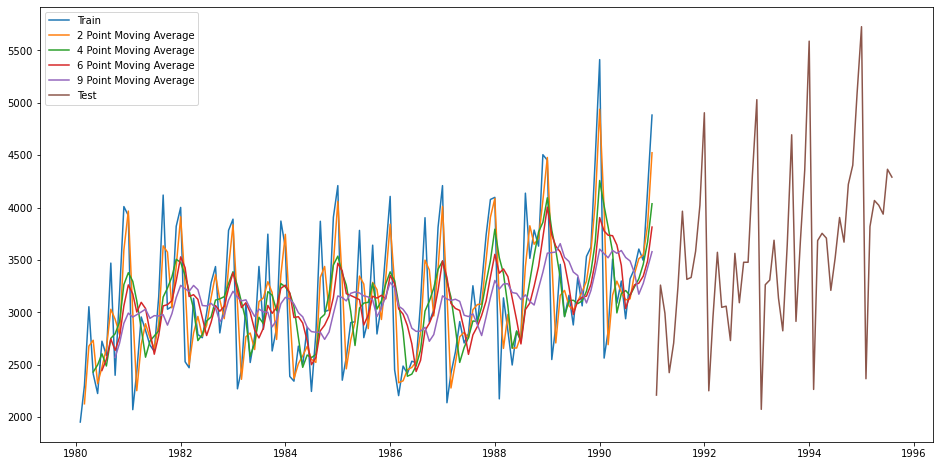

In [63]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage_train['SoftDrinkProduction'], label='Train')
plt.plot(MovingAverage_train['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage_train['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage_train['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage_train['Trailing_9'],label = '9 Point Moving Average')
plt.plot(MovingAverage_test['SoftDrinkProduction'], label='Test')

plt.legend(loc = 'best')

In [64]:
MovingAverage_test['pred_Trailing_2'] = 5166.50
MovingAverage_test['pred_Trailing_4'] = 3968.25
MovingAverage_test['pred_Trailing_6'] = 3229.50
MovingAverage_test['pred_Trailing_9'] = 2675.22

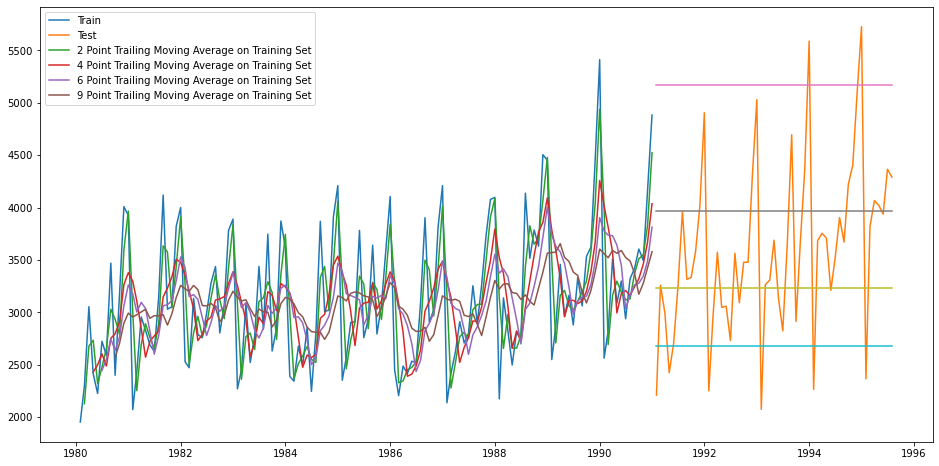

In [65]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage_train['SoftDrinkProduction'], label='Train')
plt.plot(MovingAverage_test['SoftDrinkProduction'], label='Test')

plt.plot(MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(MovingAverage_test['pred_Trailing_2'])
plt.plot(MovingAverage_test['pred_Trailing_4'])
plt.plot(MovingAverage_test['pred_Trailing_6'])
plt.plot(MovingAverage_test['pred_Trailing_9'])

plt.legend(loc = 'best')

In [66]:
from sklearn import metrics

In [67]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['SoftDrinkProduction'],MovingAverage_test['pred_Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['SoftDrinkProduction'],MovingAverage_test['pred_Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['SoftDrinkProduction'],MovingAverage_test['pred_Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['SoftDrinkProduction'],MovingAverage_test['pred_Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 1766.767
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 889.305
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 885.974
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 1223.607 


In [68]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Test RMSE
RegressionOnTime,775.81
NaiveModel,1519.26
SimpleAverageModel,934.35
2pointTrailingMovingAverage,1766.77
4pointTrailingMovingAverage,889.30
6pointTrailingMovingAverage,885.97
9pointTrailingMovingAverage,1223.61


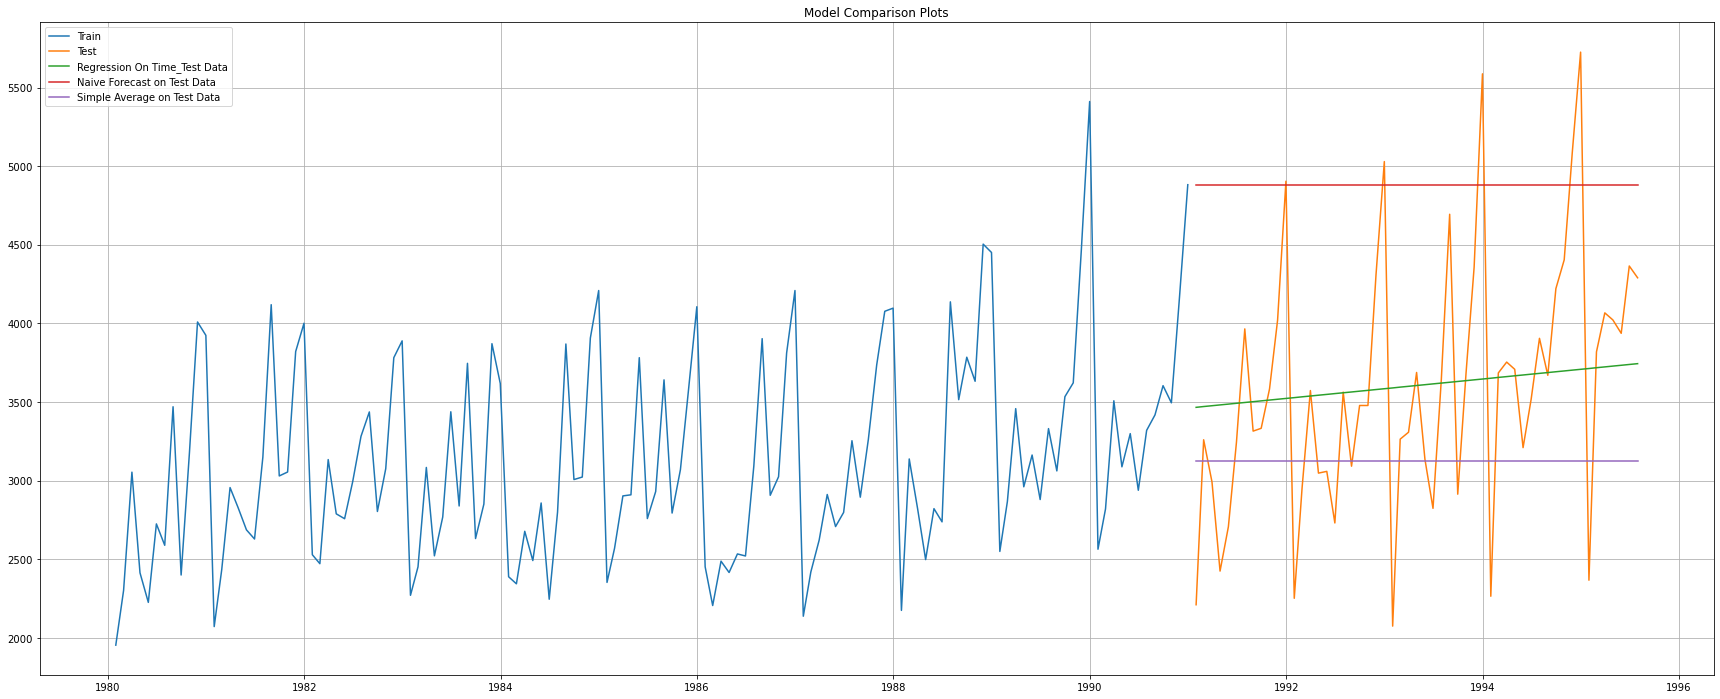

In [69]:
## Plotting on both Training and Test data

plt.figure(figsize=(30,12))
plt.plot(train['SoftDrinkProduction'], label='Train')
plt.plot(test['SoftDrinkProduction'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

## Exponential Smoothing models

### Method 5: Simple Exponential Smoothing

SES - ETS(A, N, N) - Simple Exponential Smoothing 

This method is suitable for forecasting data with no clear trend or seasonal pattern.

In [70]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [71]:
train             = df[df.index<'1991'] 
test              = df[df.index>='1991']

In [72]:
SES_train = train.copy()
SES_test = test.copy()

In [73]:
model_SES = SimpleExpSmoothing(SES_train['SoftDrinkProduction'])

C:\Users\patel\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\patel\anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [74]:
model_SES_autofit = model_SES.fit(optimized=True)

In [75]:
model_SES_autofit.params

{'smoothing_level': 0.21628856026090065,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 2297.422897653051,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [76]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

,SoftDrinkProduction,predict
Time_Stamp,,
1991-01-31,2211,3853.78
1991-02-28,3260,3853.78
1991-03-31,2992,3853.78
1991-04-30,2425,3853.78
1991-05-31,2707,3853.78


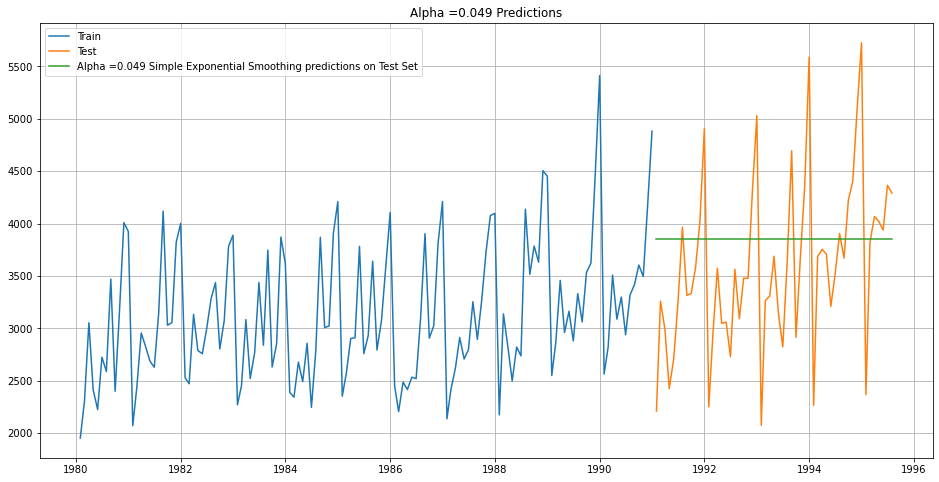

In [78]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['SoftDrinkProduction'], label='Train')
plt.plot(SES_test['SoftDrinkProduction'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.049 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.049 Predictions');

In [79]:
## Test Data

rmse_model5_test_1 = metrics.mean_squared_error(SES_test['SoftDrinkProduction'],SES_test['predict'],squared=False)
print("For Alpha =0.049 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))


For Alpha =0.049 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 847.635


In [80]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1]},index=['Alpha=0.049,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

,Test RMSE
RegressionOnTime,775.81
NaiveModel,1519.26
SimpleAverageModel,934.35
2pointTrailingMovingAverage,1766.77
4pointTrailingMovingAverage,889.30
6pointTrailingMovingAverage,885.97
9pointTrailingMovingAverage,1223.61
"Alpha=0.049,SimpleExponentialSmoothing",847.64


In [81]:
DES_train = train.copy()
DES_test = test.copy()

In [82]:
train             = df[df.index<'1991'] 
test              = df[df.index>='1991']

In [83]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(train,initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit()

print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES.params)


==Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.1242286864966588, 'smoothing_trend': 0.10769076164072929, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 2142.9200400852947, 'initial_trend': 42.27465415028941, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\patel\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


In [84]:
# Forecasting using this model for the duration of the test set
DES_predict =  model_DES.forecast(len(test))
DES_predict

1991-01-31   3727.18
1991-02-28   3751.45
1991-03-31   3775.72
1991-04-30   3799.98
1991-05-31   3824.25
1991-06-30   3848.52
1991-07-31   3872.78
1991-08-31   3897.05
1991-09-30   3921.32
1991-10-31   3945.58
1991-11-30   3969.85
1991-12-31   3994.12
1992-01-31   4018.38
1992-02-29   4042.65
1992-03-31   4066.92
1992-04-30   4091.18
1992-05-31   4115.45
1992-06-30   4139.71
1992-07-31   4163.98
1992-08-31   4188.25
1992-09-30   4212.51
1992-10-31   4236.78
1992-11-30   4261.05
1992-12-31   4285.31
1993-01-31   4309.58
1993-02-28   4333.85
1993-03-31   4358.11
1993-04-30   4382.38
1993-05-31   4406.65
1993-06-30   4430.91
1993-07-31   4455.18
1993-08-31   4479.45
1993-09-30   4503.71
1993-10-31   4527.98
1993-11-30   4552.24
1993-12-31   4576.51
1994-01-31   4600.78
1994-02-28   4625.04
1994-03-31   4649.31
1994-04-30   4673.58
1994-05-31   4697.84
1994-06-30   4722.11
1994-07-31   4746.38
1994-08-31   4770.64
1994-09-30   4794.91
1994-10-31   4819.18
1994-11-30   4843.44
1994-12-31   

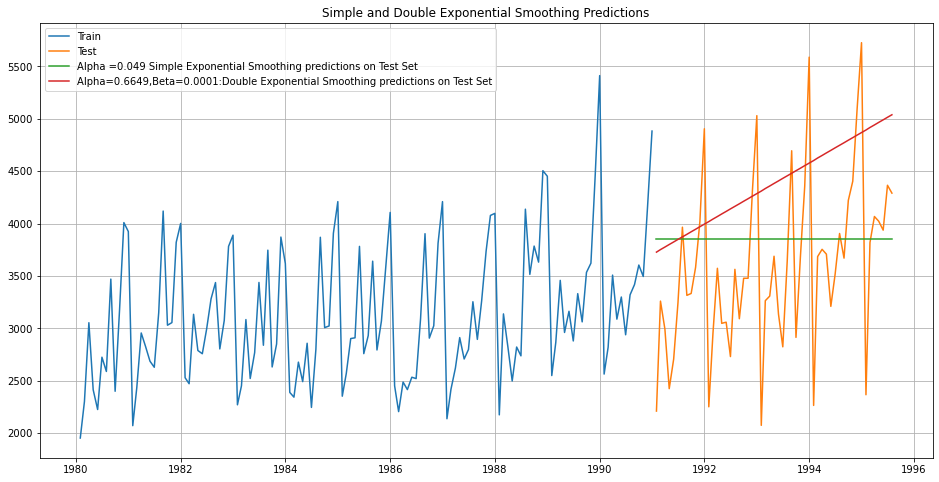

In [85]:
## Plotting the Training data, Test data and the forecasted values
plt.figure(figsize=(16,8))
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.049 Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.6649,Beta=0.0001:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');

In [86]:
print('DES RMSE:', metrics.mean_squared_error(test.values,DES_predict.values,squared=False))

DES RMSE: 1074.3291531501832


In [87]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [metrics.mean_squared_error(test.values,DES_predict.values,squared=False)]}
                           ,index=['Alpha=0.665,Beta=0.0001:DES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
RegressionOnTime,775.81
NaiveModel,1519.26
SimpleAverageModel,934.35
2pointTrailingMovingAverage,1766.77
4pointTrailingMovingAverage,889.30
6pointTrailingMovingAverage,885.97
9pointTrailingMovingAverage,1223.61
"Alpha=0.049,SimpleExponentialSmoothing",847.64
"Alpha=0.665,Beta=0.0001:DES",1074.33


In [88]:
TES_train = train.copy()
TES_test = test.copy()

In [89]:
model_TES = ExponentialSmoothing(TES_train['SoftDrinkProduction'],trend='additive',seasonal='additive',freq='M')

C:\Users\patel\anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [90]:
model_TES_autofit = model_TES.fit()

In [91]:
model_TES_autofit.params

{'smoothing_level': 0.10106888704099282,
 'smoothing_trend': 0.020308597857391426,
 'smoothing_seasonal': 0.3604344395745077,
 'damping_trend': nan,
 'initial_level': 2176.4302274241136,
 'initial_trend': 5.314758013800246,
 'initial_seasons': array([-242.9314811 ,  -34.34742846,  554.3055841 ,  236.23842847,
         207.90426496,  318.35459633,  506.66499149, 1234.92081475,
         280.80658551,  538.37082344, 1332.45858266, 1417.94312146]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [92]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

,SoftDrinkProduction,auto_predict
Time_Stamp,,
1991-01-31,2211,2572.24
1991-02-28,3260,2912.51
1991-03-31,2992,3335.15
1991-04-30,2425,3008.23
1991-05-31,2707,3212.75


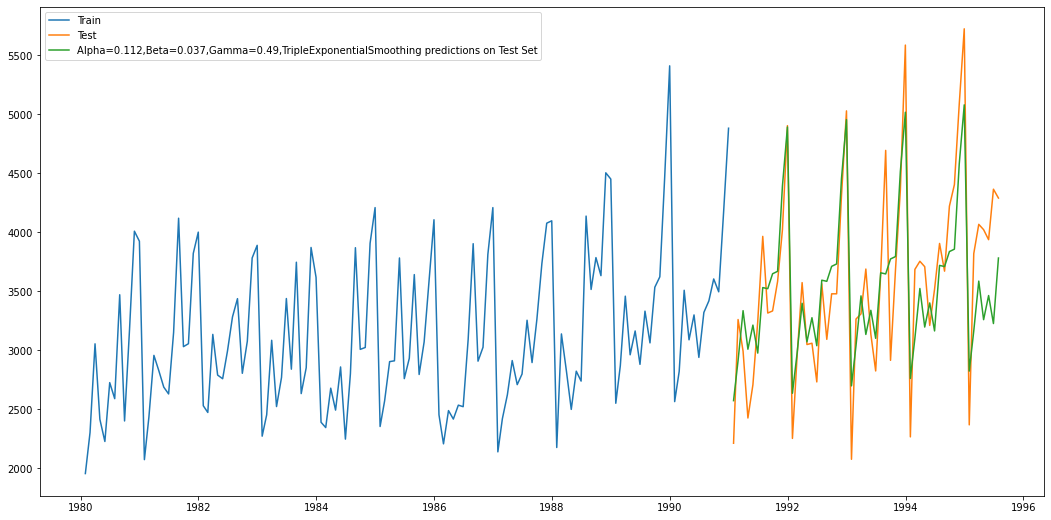

In [94]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['SoftDrinkProduction'], label='Train')
plt.plot(TES_test['SoftDrinkProduction'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.112,Beta=0.037,Gamma=0.49,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')

In [95]:
## Test Data

rmse_model6_test_1 = metrics.mean_squared_error(TES_test['SoftDrinkProduction'],TES_test['auto_predict'],squared=False)
print("For Alpha=0.112,Beta=0.037,Gamma=0.49, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test_1))

For Alpha=0.112,Beta=0.037,Gamma=0.49, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 442.217


In [96]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [metrics.mean_squared_error(test.values,TES_test['auto_predict'].values,squared=False)]}
                           ,index=['Alpha=0.112,Beta=0.037,Gamma=0.49:TES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
RegressionOnTime,775.81
NaiveModel,1519.26
SimpleAverageModel,934.35
2pointTrailingMovingAverage,1766.77
4pointTrailingMovingAverage,889.30
6pointTrailingMovingAverage,885.97
9pointTrailingMovingAverage,1223.61
"Alpha=0.049,SimpleExponentialSmoothing",847.64
"Alpha=0.665,Beta=0.0001:DES",1074.33
"Alpha=0.112,Beta=0.037,Gamma=0.49:TES",442.22


In [97]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(train,trend='add',seasonal='multiplicative',initialization_method='estimated')
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.11128429736328378, 'smoothing_trend': 0.04947326762762311, 'smoothing_seasonal': 0.23037194388521623, 'damping_trend': nan, 'initial_level': 2803.0168193984414, 'initial_trend': 10.486286228443715, 'initial_seasons': array([0.80284001, 0.86968748, 1.08266033, 0.93954787, 0.96331944,
       0.98854326, 1.0654188 , 1.28504436, 1.0083707 , 1.0929922 ,
       1.36460606, 1.41709466]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\patel\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


In [98]:
# Forecasting using this model for the duration of the test set
TES_predict_am =  model_TES_am.forecast(len(test))
TES_predict_am

1991-01-31   2564.87
1991-02-28   2887.85
1991-03-31   3300.06
1991-04-30   3007.35
1991-05-31   3213.74
1991-06-30   3020.09
1991-07-31   3573.89
1991-08-31   3716.17
1991-09-30   3598.07
1991-10-31   3680.52
1991-11-30   4458.77
1991-12-31   4868.95
1992-01-31   2605.68
1992-02-29   2933.73
1992-03-31   3352.42
1992-04-30   3055.00
1992-05-31   3264.60
1992-06-30   3067.82
1992-07-31   3630.30
1992-08-31   3774.75
1992-09-30   3654.71
1992-10-31   3738.38
1992-11-30   4528.78
1992-12-31   4945.30
1993-01-31   2646.48
1993-02-28   2979.62
1993-03-31   3404.78
1993-04-30   3102.66
1993-05-31   3315.46
1993-06-30   3115.55
1993-07-31   3686.71
1993-08-31   3833.32
1993-09-30   3711.36
1993-10-31   3796.25
1993-11-30   4598.79
1993-12-31   5021.65
1994-01-31   2687.29
1994-02-28   3025.50
1994-03-31   3457.15
1994-04-30   3150.32
1994-05-31   3366.32
1994-06-30   3163.28
1994-07-31   3743.12
1994-08-31   3891.90
1994-09-30   3768.00
1994-10-31   3854.11
1994-11-30   4668.80
1994-12-31   

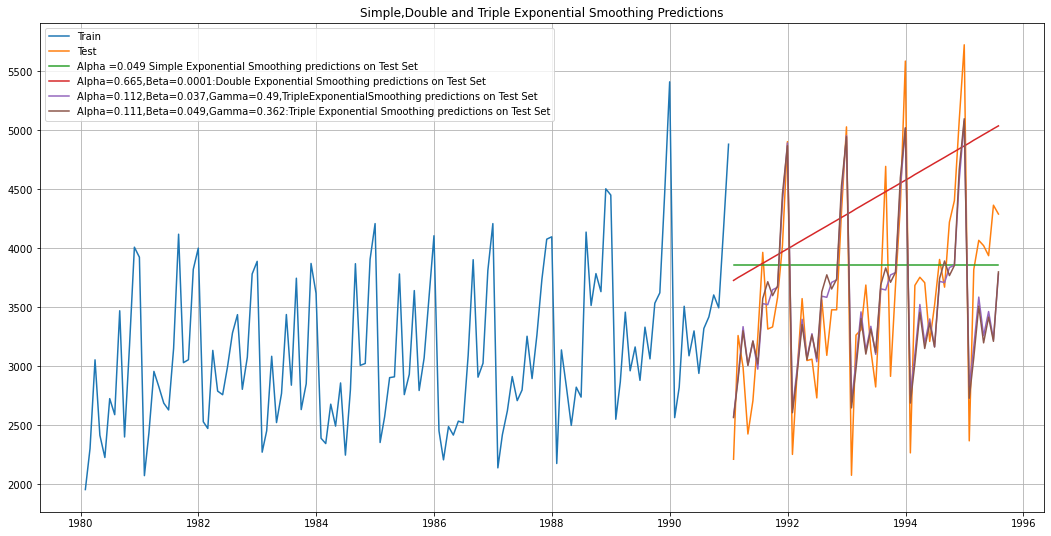

In [99]:
## Plotting the Training data, Test data and the forecasted values
plt.figure(figsize=(18,9))
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.049 Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.665,Beta=0.0001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_test['auto_predict'], label='Alpha=0.112,Beta=0.037,Gamma=0.49,TripleExponentialSmoothing predictions on Test Set')
plt.plot(TES_predict_am, label='Alpha=0.111,Beta=0.049,Gamma=0.362:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

In [100]:
print('TES_am RMSE:',metrics.mean_squared_error(test.values,TES_predict_am.values,squared=False))

TES_am RMSE: 447.7225807439294


In [101]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [metrics.mean_squared_error(test.values,TES_predict_am.values,squared=False)]}
                           ,index=['Alpha=0.111,Beta=0.061,Gamma=0.362:TES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
RegressionOnTime,775.81
NaiveModel,1519.26
SimpleAverageModel,934.35
2pointTrailingMovingAverage,1766.77
4pointTrailingMovingAverage,889.30
6pointTrailingMovingAverage,885.97
9pointTrailingMovingAverage,1223.61
"Alpha=0.049,SimpleExponentialSmoothing",847.64
"Alpha=0.665,Beta=0.0001:DES",1074.33
"Alpha=0.112,Beta=0.037,Gamma=0.49:TES",442.22


In [102]:
from statsmodels.tsa.stattools import adfuller

In [104]:
dftest = adfuller(df,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -0.425
DF test p-value is 0.9861019765758295
Number of lags used 12


In [105]:
dftest = adfuller(df.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -9.481
DF test p-value is 3.053709292535892e-14
Number of lags used 11


<AxesSubplot:xlabel='Time_Stamp'>

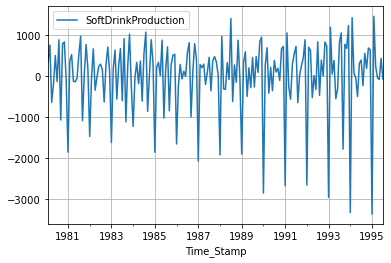

In [107]:
df.diff().dropna().plot(grid=True)

In [108]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [109]:
# The following code is to set the subsequent figure sizes

from pylab import rcParams
rcParams['figure.figsize'] = 16,9

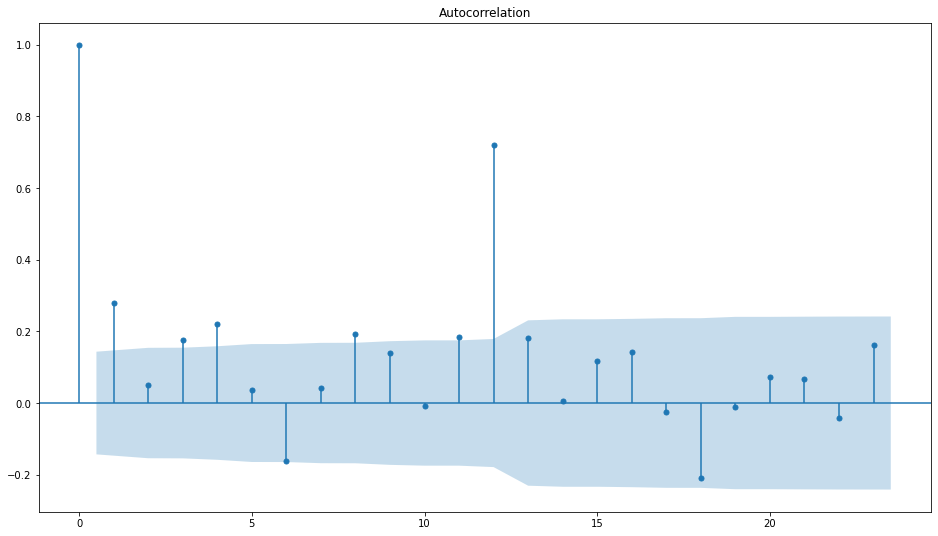

In [110]:
plot_acf(df,alpha=0.05);

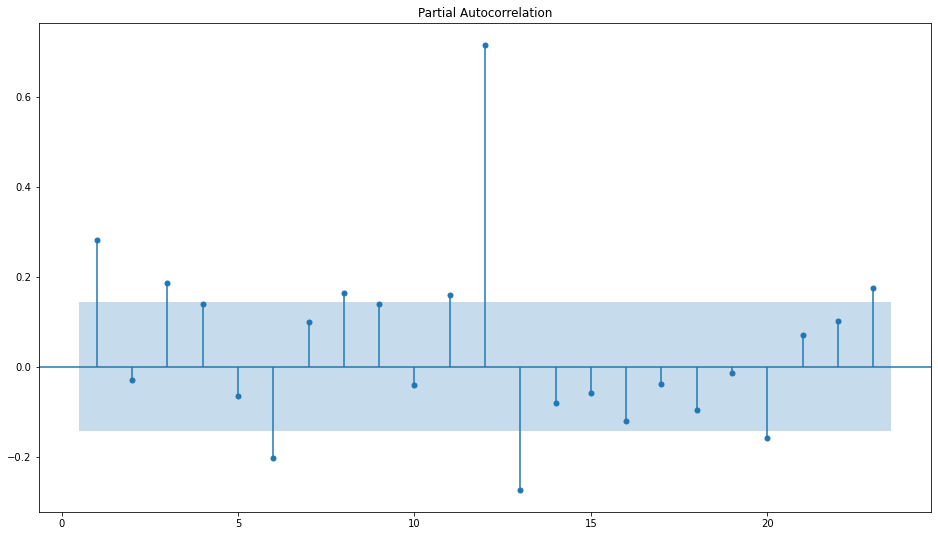

In [111]:
plot_pacf(df,zero=False,alpha=0.05);

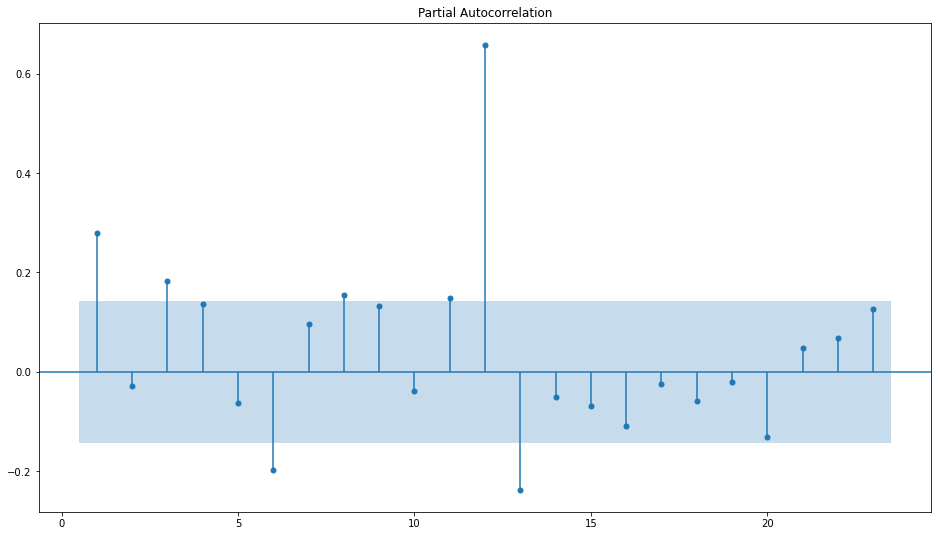

In [112]:
plot_pacf(df,zero=False,alpha=0.05,method='ywmle');

In [113]:
df.index.year.unique()

Int64Index([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
            1991, 1992, 1993, 1994, 1995],
           dtype='int64', name='Time_Stamp')

In [114]:
train             = df[df.index<'1991'] 
test              = df[df.index>='1991']

In [115]:
## This is to display multiple data frames from one cell
from IPython.display import display

In [116]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,SoftDrinkProduction
Time_Stamp,
1980-01-31,1954
1980-02-29,2302
1980-03-31,3054
1980-04-30,2414
1980-05-31,2226


Last few rows of Training Data


,SoftDrinkProduction
Time_Stamp,
1990-08-31,3418
1990-09-30,3604
1990-10-31,3495
1990-11-30,4163
1990-12-31,4882


First few rows of Test Data


,SoftDrinkProduction
Time_Stamp,
1991-01-31,2211
1991-02-28,3260
1991-03-31,2992
1991-04-30,2425
1991-05-31,2707


Last few rows of Test Data


,SoftDrinkProduction
Time_Stamp,
1995-03-31,4067
1995-04-30,4022
1995-05-31,3937
1995-06-30,4365
1995-07-31,4290


In [117]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


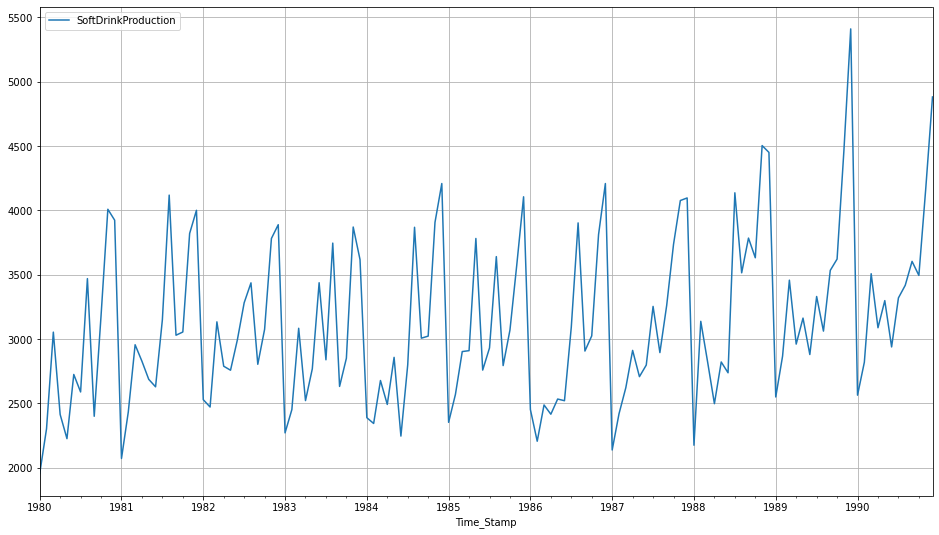

In [118]:
train.plot(grid=True);

In [119]:
dftest = adfuller(train,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -1.649
DF test p-value is 0.7726647141271921
Number of lags used 12


In [120]:
dftest = adfuller(train.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -7.271
DF test p-value is 3.4205181049971006e-09
Number of lags used 11


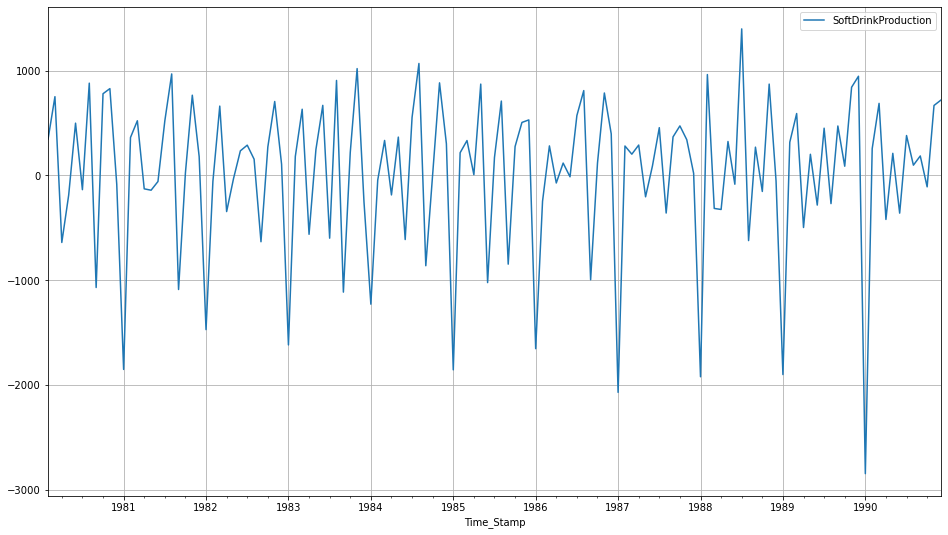

In [121]:
train.diff().dropna().plot(grid=True);

In [122]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-31 to 1990-12-31
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   SoftDrinkProduction  132 non-null    int64
dtypes: int64(1)
memory usage: 2.1 KB


In [123]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [124]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [126]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:# running a loop within the pdq parameters defined by itertools
    ARIMA_model = ARIMA(train['SoftDrinkProduction'].values,order=param).fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))#printing the parameters and the AIC
    #from the fitted models
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC values

ARIMA(0, 1, 0) - AIC:2103.7338336875
ARIMA(0, 1, 1) - AIC:2069.5996302114518
ARIMA(0, 1, 2) - AIC:2056.4892632434753
ARIMA(0, 1, 3) - AIC:2056.8317894192332
ARIMA(1, 1, 0) - AIC:2097.8721216490417
ARIMA(1, 1, 1) - AIC:2061.5230839321466
ARIMA(1, 1, 2) - AIC:2056.7156820689106
ARIMA(1, 1, 3) - AIC:2058.712159036549
ARIMA(2, 1, 0) - AIC:2073.234860536023
ARIMA(2, 1, 1) - AIC:2059.100671813345
ARIMA(2, 1, 2) - AIC:2058.7127021000138


C:\Users\patel\anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 3) - AIC:2057.09992544444
ARIMA(3, 1, 0) - AIC:2070.3653671411857
ARIMA(3, 1, 1) - AIC:2058.3045460082294
ARIMA(3, 1, 2) - AIC:2060.6799657016645
ARIMA(3, 1, 3) - AIC:2059.582235902003


C:\Users\patel\anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [127]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

,param,AIC
2,"(0, 1, 2)",2056.49
6,"(1, 1, 2)",2056.72
3,"(0, 1, 3)",2056.83
11,"(2, 1, 3)",2057.10
13,"(3, 1, 1)",2058.30


In [128]:
auto_ARIMA = ARIMA(train, order=(2,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                                SARIMAX Results                                
Dep. Variable:     SoftDrinkProduction   No. Observations:                  132
Model:                  ARIMA(2, 1, 2)   Log Likelihood               -1024.356
Date:                 Mon, 30 Jan 2023   AIC                           2058.713
Time:                         19:36:50   BIC                           2073.089
Sample:                     01-31-1980   HQIC                          2064.554
                          - 12-31-1990                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2838      0.304     -0.933      0.351      -0.880       0.312
ar.L2         -0.0078      0.179     -0.044      0.965      -0.359       0.343
ma.L1         -0.3008      0.263     -1.145 

C:\Users\patel\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\patel\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\patel\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


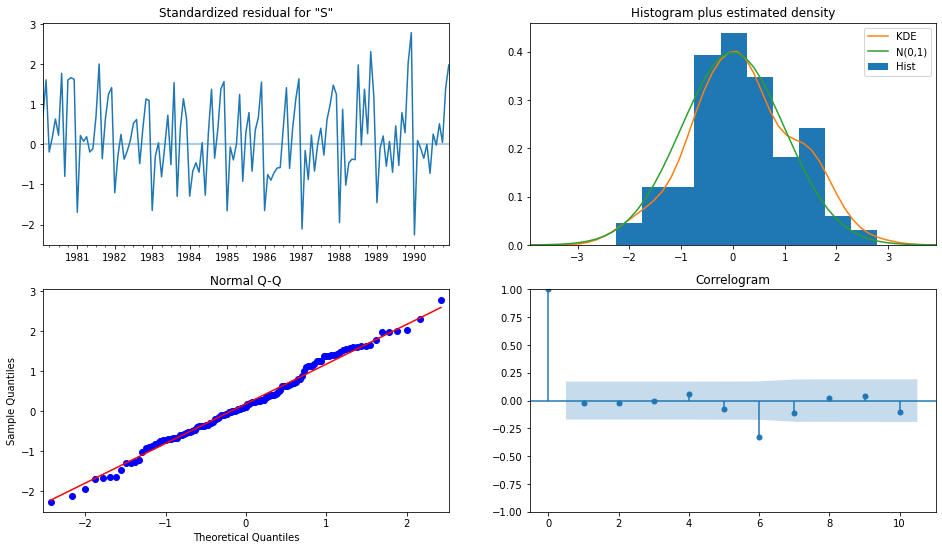

In [129]:
results_auto_ARIMA.plot_diagnostics();

In [130]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [131]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

## Importing the mean_squared_error function from sklearn to calculate the RMSE

from sklearn.metrics import mean_squared_error

In [132]:
rmse = mean_squared_error(test['SoftDrinkProduction'],predicted_auto_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['SoftDrinkProduction'],predicted_auto_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 823.0304931635245 
MAPE: 18.382281831419284


In [133]:
resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['ARIMA(2,1,2)'])

resultsDf

,RMSE,MAPE
"ARIMA(2,1,2)",823.03,18.38


C:\Users\patel\anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


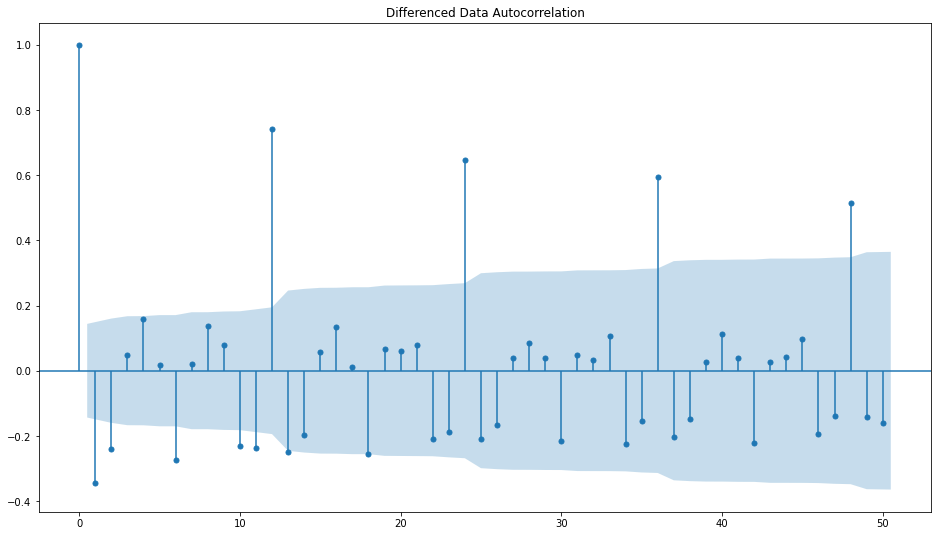

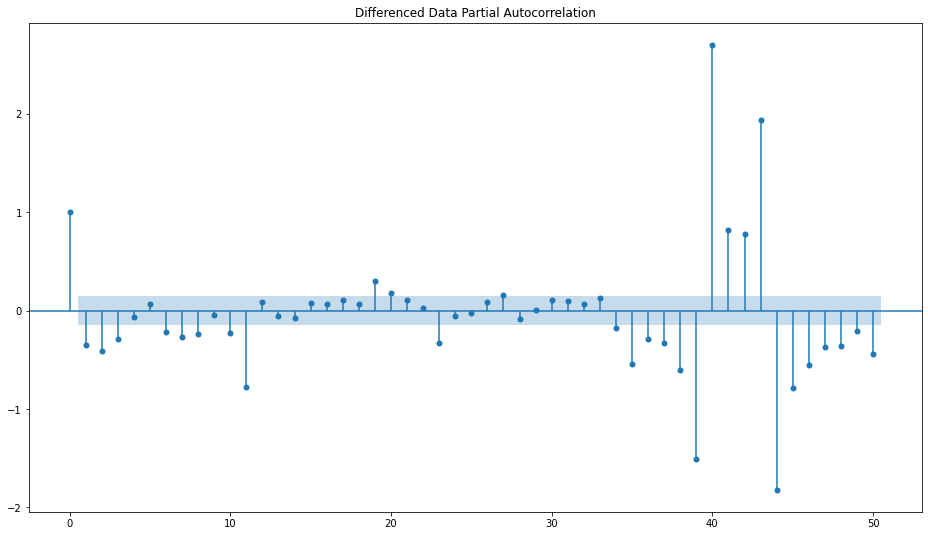

In [135]:
plot_acf(df['SoftDrinkProduction'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['SoftDrinkProduction'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

In [137]:
manual_ARIMA = ARIMA(train['SoftDrinkProduction'].astype('float64'), order=(3,1,2),freq='M')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

C:\Users\patel\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


                                SARIMAX Results                                
Dep. Variable:     SoftDrinkProduction   No. Observations:                  132
Model:                  ARIMA(3, 1, 2)   Log Likelihood               -1024.340
Date:                 Mon, 30 Jan 2023   AIC                           2060.680
Time:                         19:43:13   BIC                           2077.931
Sample:                     01-31-1980   HQIC                          2067.690
                          - 12-31-1990                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3216      0.460     -0.700      0.484      -1.223       0.579
ar.L2         -0.0001      0.189     -0.001      0.999      -0.371       0.370
ar.L3         -0.0227      0.218     -0.104 

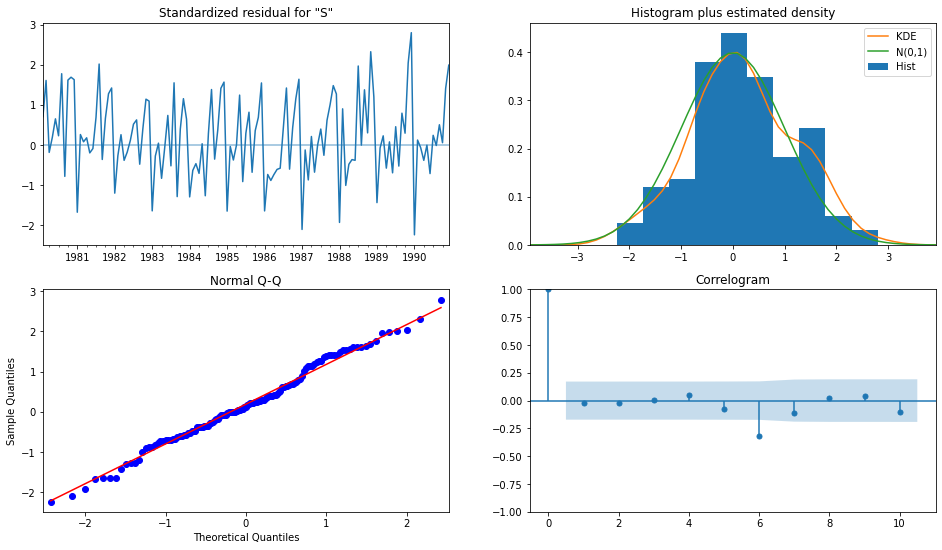

In [138]:
results_manual_ARIMA.plot_diagnostics();

In [139]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [140]:
rmse = mean_squared_error(test['SoftDrinkProduction'],predicted_manual_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['SoftDrinkProduction'],predicted_manual_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 822.2174595819436 
MAPE: 18.363067972722387


In [141]:
temp_resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['ARIMA(3,1,2)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE,MAPE
"ARIMA(2,1,2)",823.03,18.38
"ARIMA(3,1,2)",822.22,18.36


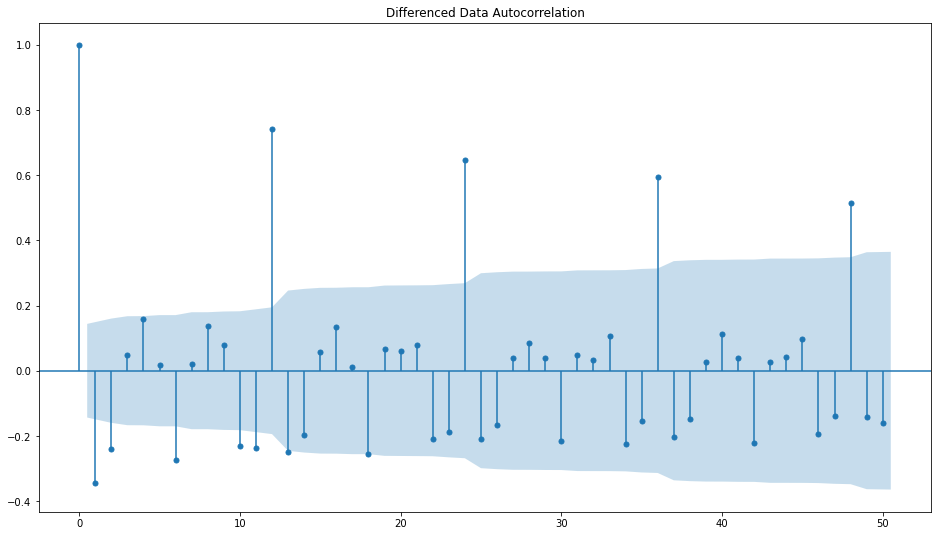

In [143]:
plot_acf(df['SoftDrinkProduction'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

In [144]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)


In [145]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [155]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['SoftDrinkProduction'],
                                order=(1, 1, 2),
                                seasonal_order=(2, 0, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

C:\Users\patel\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\patel\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


                                         SARIMAX Results                                         
Dep. Variable:                       SoftDrinkProduction   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(2, 0, [1, 2, 3], 6)   Log Likelihood                -792.739
Date:                                   Mon, 30 Jan 2023   AIC                           1603.478
Time:                                           20:23:24   BIC                           1627.783
Sample:                                       01-31-1980   HQIC                          1613.336
                                            - 12-31-1990                                         
Covariance Type:                                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5808      0.489     -1.188      0.235    

In [157]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC


In [159]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['SoftDrinkProduction'],
                                order=(1, 1, 2),
                                seasonal_order=(2, 0, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

C:\Users\patel\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\patel\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


                                         SARIMAX Results                                         
Dep. Variable:                       SoftDrinkProduction   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(2, 0, [1, 2, 3], 6)   Log Likelihood                -792.739
Date:                                   Mon, 30 Jan 2023   AIC                           1603.478
Time:                                           20:24:28   BIC                           1627.783
Sample:                                       01-31-1980   HQIC                          1613.336
                                            - 12-31-1990                                         
Covariance Type:                                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5808      0.489     -1.188      0.235    

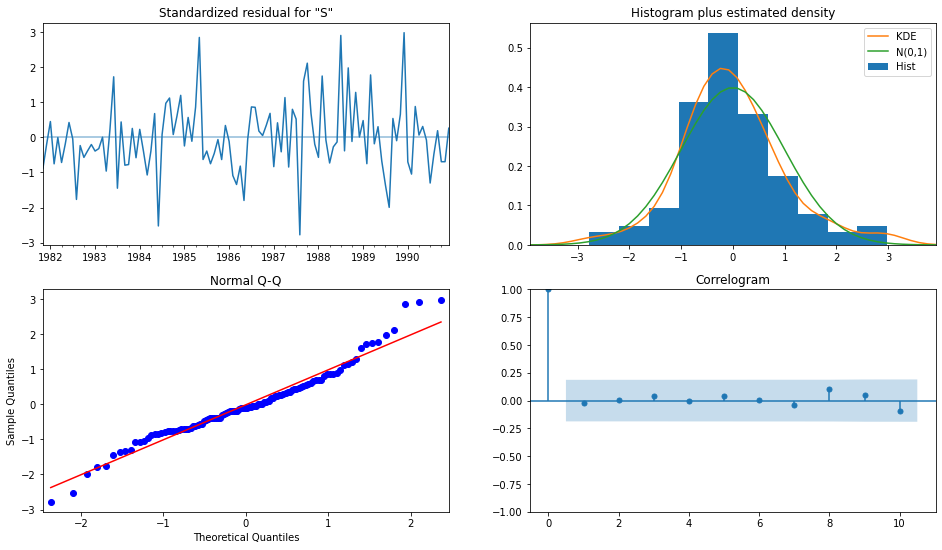

In [160]:
results_auto_SARIMA.plot_diagnostics();

In [161]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [162]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

SoftDrinkProduction,mean,mean_se,mean_ci_lower,mean_ci_upper
1991-01-31,2703.66,317.24,2081.88,3325.43
1991-02-28,3065.07,324.86,2428.35,3701.79
1991-03-31,3346.28,325.93,2707.48,3985.09
1991-04-30,3090.60,329.98,2443.84,3737.35
1991-05-31,3284.39,332.04,2633.60,3935.18


In [163]:
rmse = mean_squared_error(test['SoftDrinkProduction'],predicted_auto_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['SoftDrinkProduction'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 445.75817900287734 
MAPE: 11.086878428303377


In [164]:
temp_resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['SARIMA(1,1,2)(2,0,3,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE,MAPE
"ARIMA(2,1,2)",823.03,18.38
"ARIMA(3,1,2)",822.22,18.36
"SARIMA(1,1,2)(2,0,3,6)",445.76,11.09


In [165]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [166]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [167]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['SoftDrinkProduction'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2088.4633983660715
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1836.220093770644
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1633.549179365374
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1789.866280699666
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1764.6107238900088
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1591.5155744481322
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1608.648860364038
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1608.616528397923
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1591.8014039553923
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2035.4871783907797
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1788.536969484525
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1577.0183750566173
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1749.9824755850375
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1697.79973110335
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1530.69143156
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1563.4637994171042
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1558.2120753733957
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1529.2536659301913
SARIMA(0, 1, 2)x(0, 0, 

In [168]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
26,"(0, 1, 2)","(2, 0, 2, 12)",1517.21
23,"(0, 1, 2)","(1, 0, 2, 12)",1518.23
53,"(1, 1, 2)","(2, 0, 2, 12)",1518.33
50,"(1, 1, 2)","(1, 0, 2, 12)",1519.20
80,"(2, 1, 2)","(2, 0, 2, 12)",1520.31


In [170]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['SoftDrinkProduction'].values,
                                order=(1, 1, 2),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood                -752.599
Date:                            Mon, 30 Jan 2023   AIC                           1519.197
Time:                                    20:30:38   BIC                           1537.708
Sample:                                         0   HQIC                          1526.696
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6665      0.306     -2.180      0.029      -1.266      -0.067
ma.L1         -0.1309      0.310   

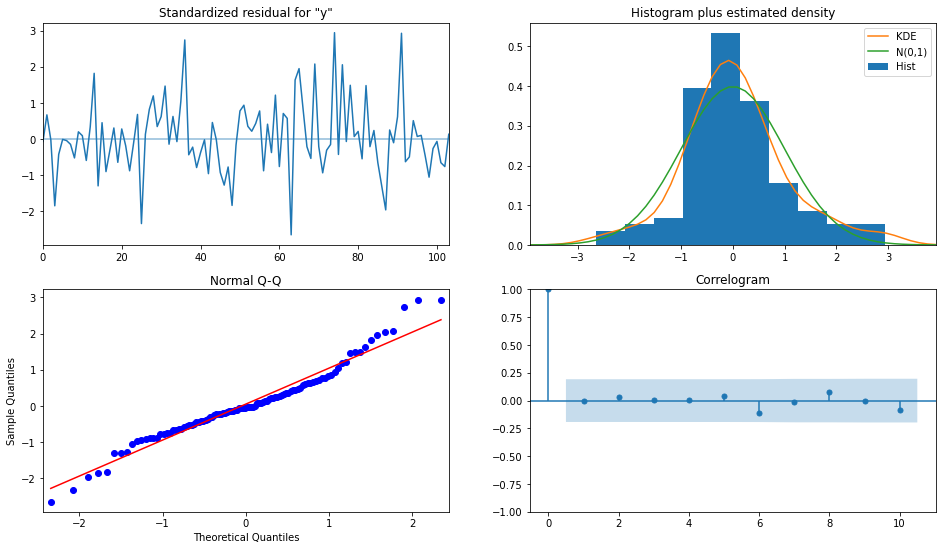

In [171]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

In [172]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

In [173]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,2662.17,328.30,2018.71,3305.63
1,2957.18,334.97,2300.65,3613.71
2,3404.71,335.24,2747.64,4061.78
3,3079.30,338.78,2415.30,3743.29
4,3284.21,339.72,2618.36,3950.05


In [174]:
rmse = mean_squared_error(test['SoftDrinkProduction'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['SoftDrinkProduction'],predicted_auto_SARIMA_12.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 444.30232779356083 
MAPE: 11.09447237825753


In [175]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse],'MAPE':mape}
                           ,index=['SARIMA(1,1,2)(1,0,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE,MAPE
"ARIMA(2,1,2)",823.03,18.38
"ARIMA(3,1,2)",822.22,18.36
"SARIMA(1,1,2)(2,0,3,6)",445.76,11.09
"SARIMA(1,1,2)(1,0,2,12)",444.30,11.09


C:\Users\patel\anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


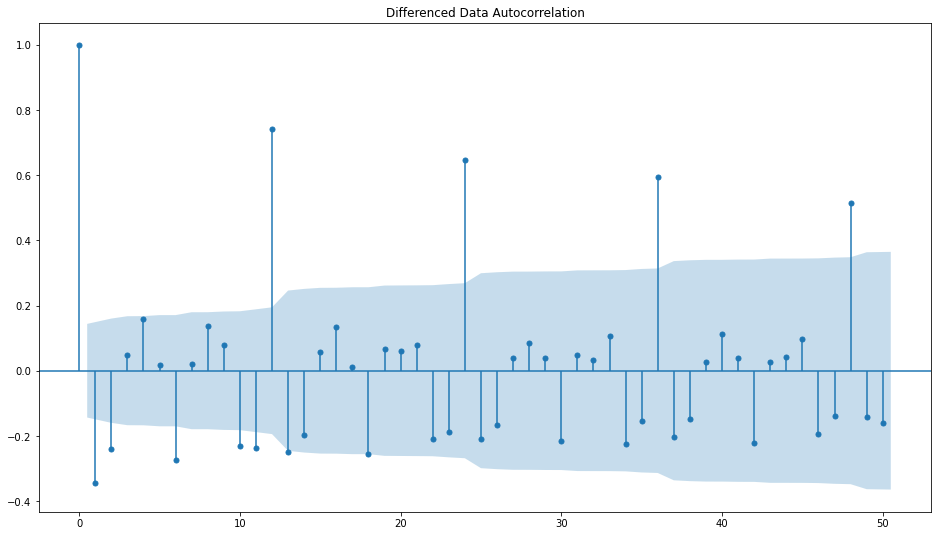

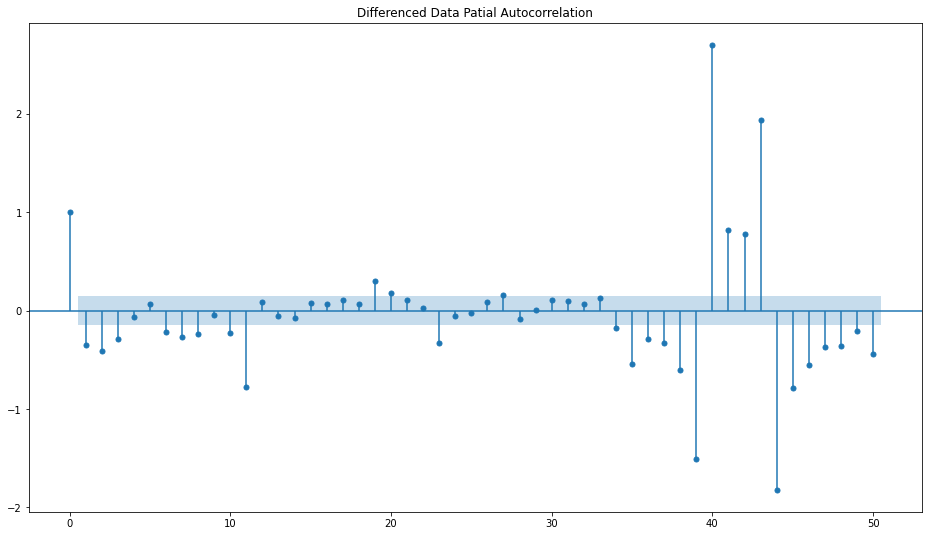

In [176]:
plot_acf(df['SoftDrinkProduction'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['SoftDrinkProduction'].diff().dropna(),lags=50,title='Differenced Data Patial Autocorrelation')
plt.show()

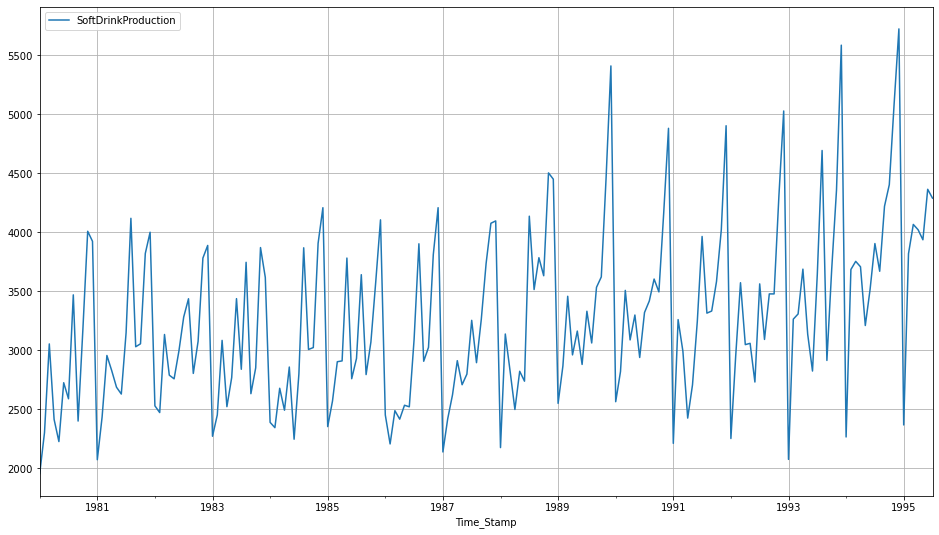

In [177]:
df.plot()
plt.grid();

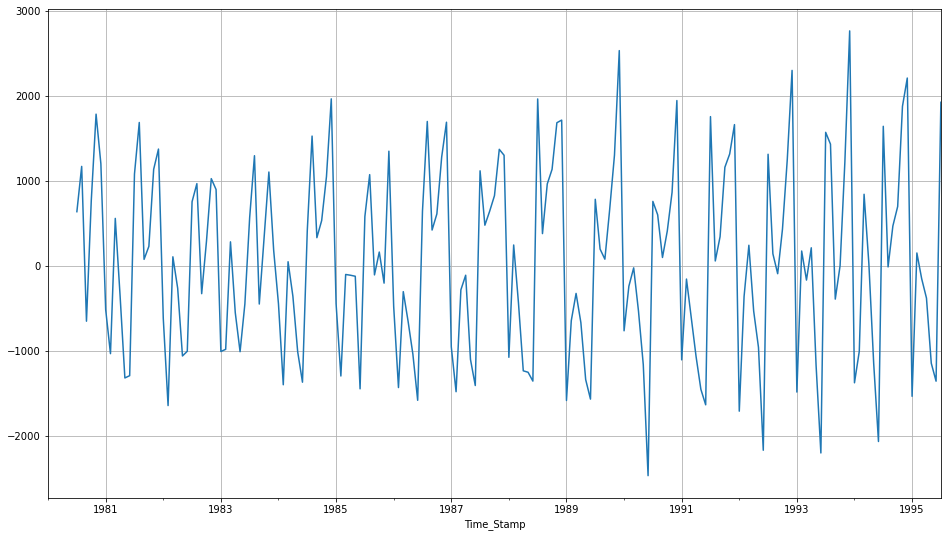

In [181]:
(df['SoftDrinkProduction'].diff(6)).plot()
plt.grid();

In [182]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

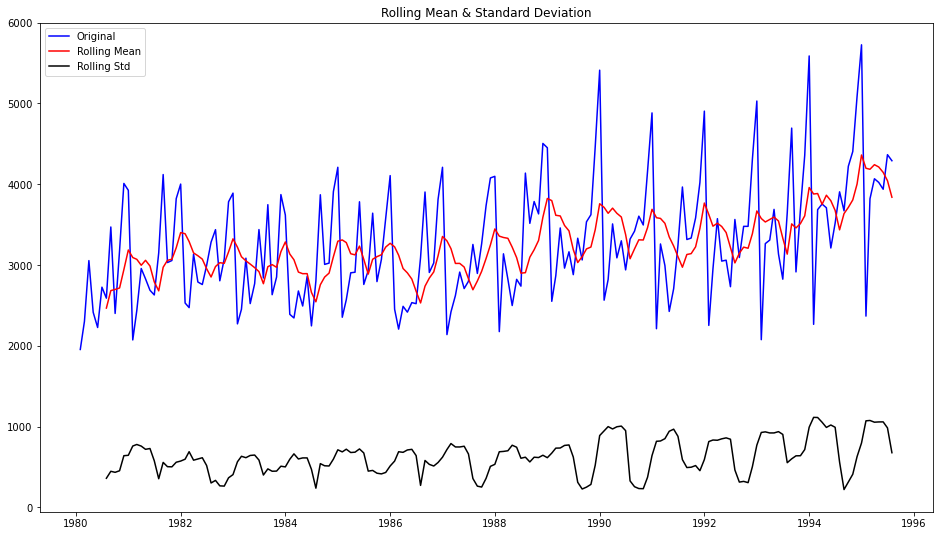

Results of Dickey-Fuller Test:
Test Statistic                  1.10
p-value                         1.00
#Lags Used                     12.00
Number of Observations Used   174.00
Critical Value (1%)            -3.47
Critical Value (5%)            -2.88
Critical Value (10%)           -2.58
dtype: float64 



In [183]:
test_stationarity(df['SoftDrinkProduction'])

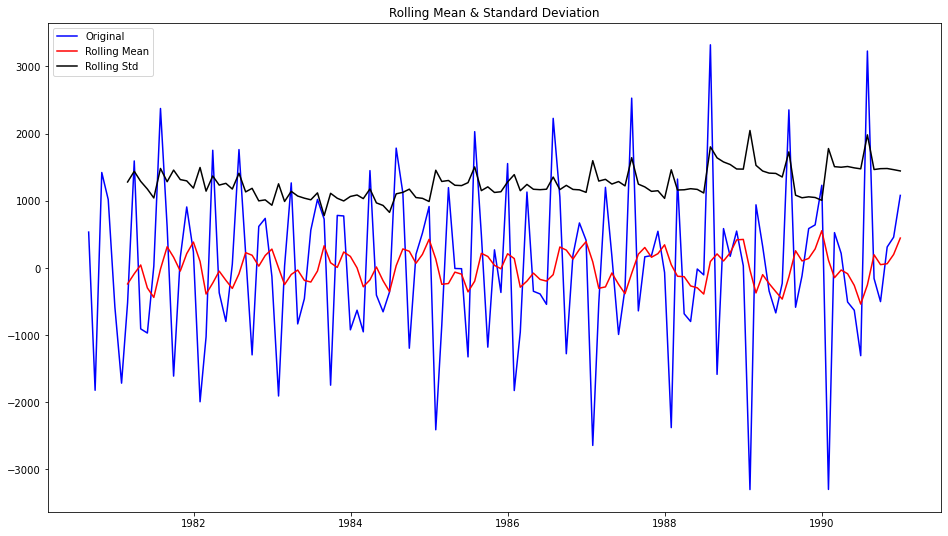

Results of Dickey-Fuller Test:
Test Statistic                 -7.17
p-value                         0.00
#Lags Used                     12.00
Number of Observations Used   112.00
Critical Value (1%)            -3.49
Critical Value (5%)            -2.89
Critical Value (10%)           -2.58
dtype: float64 



In [184]:
test_stationarity((train['SoftDrinkProduction'].diff(6).dropna()).diff(1).dropna())

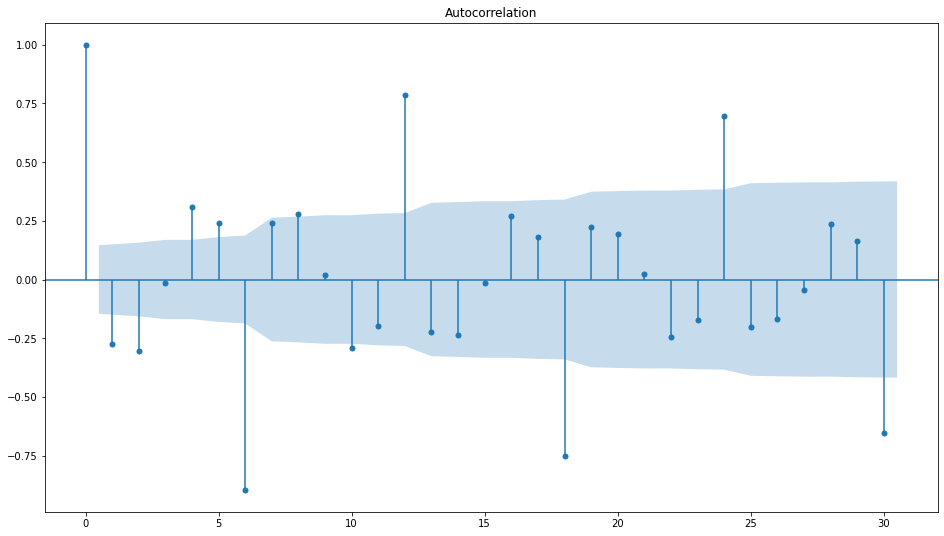

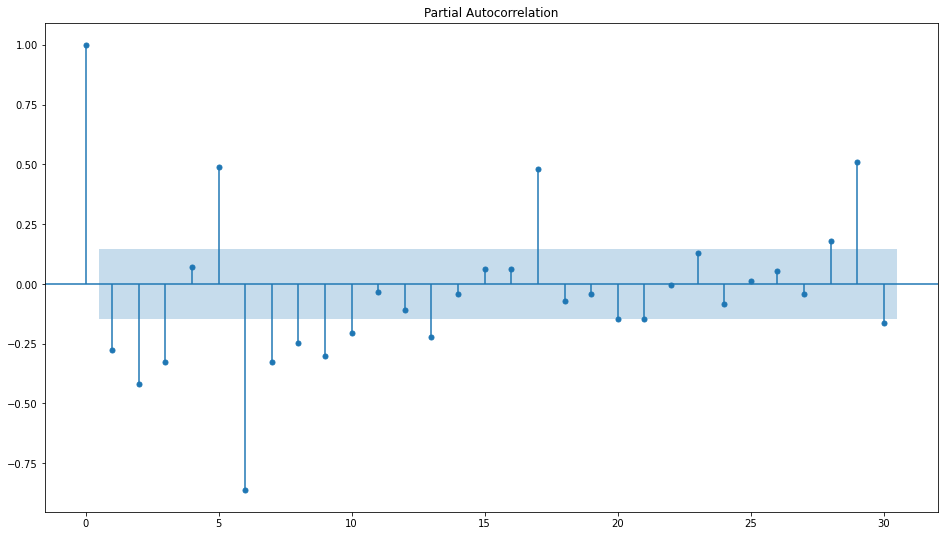

In [185]:
plot_acf((df['SoftDrinkProduction'].diff(6).dropna()).diff(1).dropna(),lags=30)
plot_pacf((df['SoftDrinkProduction'].diff(6).dropna()).diff(1).dropna(),lags=30);

In [186]:
import statsmodels.api as sm

manual_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['SoftDrinkProduction'].values,
                                order=(2, 1, 2),
                                seasonal_order=(1, 1, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_6 = manual_SARIMA_6.fit(maxiter=1000)
print(results_manual_SARIMA_6.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(1, 1, 2, 6)   Log Likelihood                -792.110
Date:                           Mon, 30 Jan 2023   AIC                           1600.221
Time:                                   20:45:16   BIC                           1621.824
Sample:                                        0   HQIC                          1608.983
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0460      1.498      0.031      0.976      -2.891       2.983
ar.L2         -0.0601      0.160     -0.376

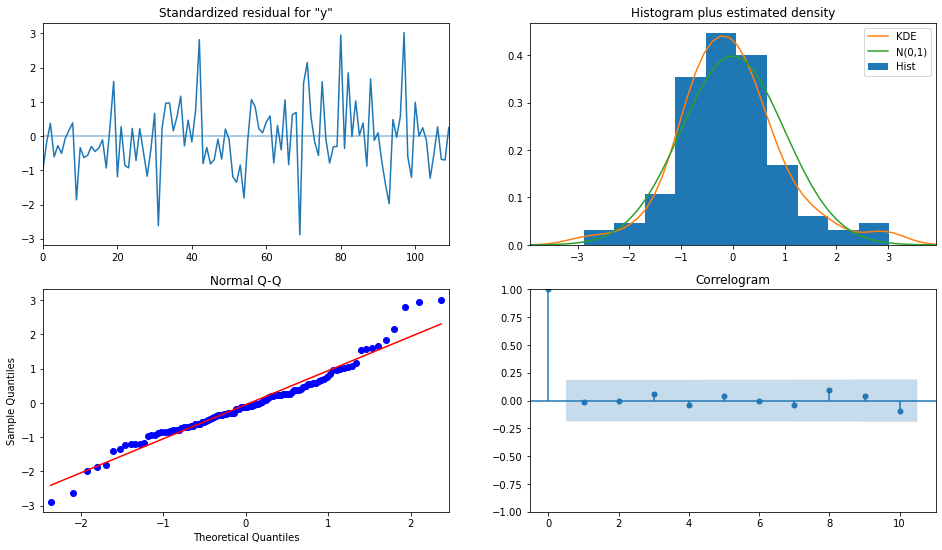

In [187]:
results_manual_SARIMA_6.plot_diagnostics()
plt.show()

In [188]:
predicted_manual_SARIMA_6 = results_manual_SARIMA_6.get_forecast(steps=len(test))

In [189]:
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,2692.96,318.35,2069.00,3316.91
1,3101.91,325.36,2464.22,3739.59
2,3317.23,327.13,2676.06,3958.40
3,3083.25,330.59,2435.30,3731.20
4,3297.31,334.40,2641.90,3952.71


In [190]:
rmse = mean_squared_error(test['SoftDrinkProduction'],predicted_manual_SARIMA_6.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['SoftDrinkProduction'],predicted_manual_SARIMA_6.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 442.0033589004224 
MAPE: 10.9718453846794


In [191]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse],'MAPE':mape}
                           ,index=['SARIMA(2,1,2)(1,1,2,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE,MAPE
"ARIMA(2,1,2)",823.03,18.38
"ARIMA(3,1,2)",822.22,18.36
"SARIMA(1,1,2)(2,0,3,6)",445.76,11.09
"SARIMA(1,1,2)(1,0,2,12)",444.30,11.09
"SARIMA(2,1,2)(1,1,2,6)",442.00,10.97


In [193]:
full_data_model = sm.tsa.statespace.SARIMAX(df['SoftDrinkProduction'],
                                order=(1,1,2),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

C:\Users\patel\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\patel\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                      
Dep. Variable:                SoftDrinkProduction   No. Observations:                  187
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood               -1158.758
Date:                            Mon, 30 Jan 2023   AIC                           2331.515
Time:                                    20:50:16   BIC                           2352.997
Sample:                                01-31-1980   HQIC                          2340.239
                                     - 07-31-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7896      0.511     -1.544      0.123      -1.792       0.213
ma.L1         -0.4115      0.561   

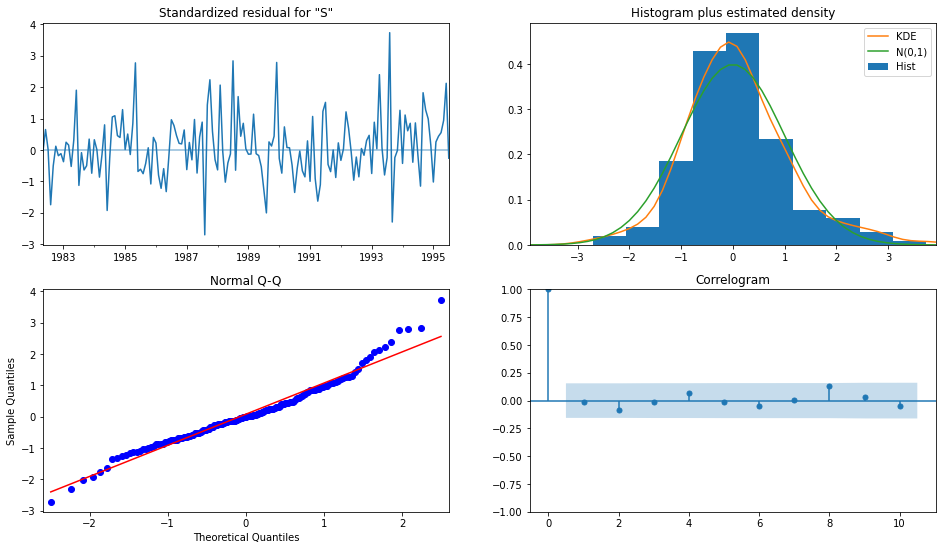

In [194]:
results_full_data_model.plot_diagnostics();

In [195]:
predicted_manual_SARIMA_12_full_data = results_full_data_model.get_forecast(steps=12)

In [196]:
predicted_manual_SARIMA_12_full_data.summary_frame(alpha=0.05).head()

SoftDrinkProduction,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-08-31,4460.53,347.53,3779.38,5141.67
1995-09-30,4198.96,349.97,3513.03,4884.90
1995-10-31,4521.21,354.67,3826.08,5216.35
1995-11-30,5212.13,357.47,4511.50,5912.76
1995-12-31,6075.92,361.65,5367.09,6784.74


In [198]:
rmse = mean_squared_error(df['SoftDrinkProduction'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 460.27037648239224


In [199]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_12_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-31',end='1996-08-01', freq='M'))

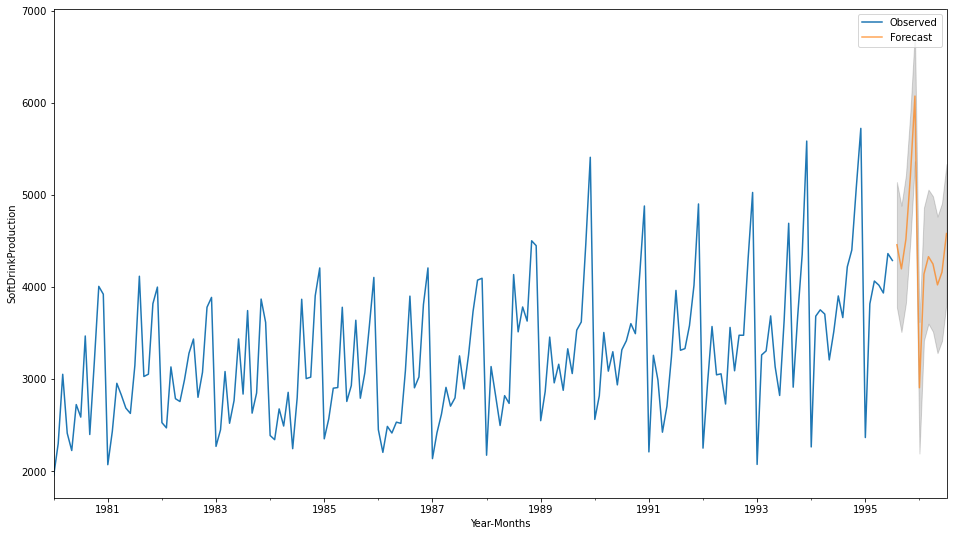

In [201]:
# plot the forecast along with the confidence band

axis = df['SoftDrinkProduction'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('SoftDrinkProduction')
plt.legend(loc='best')
plt.show()

In [202]:
resultsDf

,RMSE,MAPE
"ARIMA(2,1,2)",823.03,18.38
"ARIMA(3,1,2)",822.22,18.36
"SARIMA(1,1,2)(2,0,3,6)",445.76,11.09
"SARIMA(1,1,2)(1,0,2,12)",444.30,11.09
"SARIMA(2,1,2)(1,1,2,6)",442.00,10.97


# END